In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=50 #Número de ciudades.
L=100
inf=1000
x=np.random.rand(N)*L
y=np.random.rand(N)*L
dist=np.zeros((N,N), dtype=float)
for i in range(N-1):
  dist[i,i]=inf
  for j in range(i+1,N):
    dist[i,j]=np.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
    dist[j,i]=dist[i,j]

#Soluciones aleatorias:
M=200
poblacion=[np.random.permutation(range(N)) for i in range(M)]

In [ ]:
poblacion[0:2]

[array([18, 14, 30, 26, 40, 19, 32, 12, 20, 36, 45, 37, 39, 35,  7, 24, 48,
        17, 13, 34,  6,  8, 46, 33, 16, 21,  5, 42, 38, 15, 31,  0, 47, 23,
        28, 11, 29,  1, 43, 44, 25,  2, 27,  9, 49, 10, 41, 22,  3,  4]),
 array([47, 44,  4, 11, 32, 16, 31,  3, 24, 27,  0,  1, 29,  8, 38, 17, 18,
        46, 35, 39, 42, 49,  6, 23, 41, 22, 21, 48,  9,  2, 12, 43, 40, 33,
         7, 36,  5, 26, 30, 37, 14, 45, 20, 10, 15, 34, 28, 19, 13, 25])]

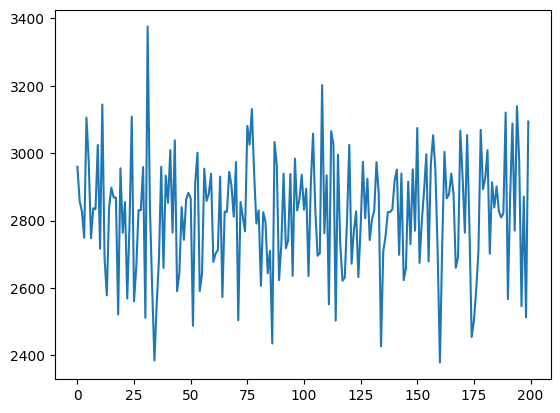

In [ ]:
def fitness(seq):
  d=dist[seq[-1], seq[0]]
  for i in range(N-1):
    d+=dist[seq[i], seq[i+1]]
  return d
plt.plot([fitness(x) for x in poblacion])

In [ ]:


def prunning(poblacion, n_remover=10): #n_remover significa, cuántos se eliminan
  #Vamos a calcular las probabilidades:
  di=[fitness(pob) for pob in poblacion]
  pr=[d-min(di) for d in di]
  K=np.sum(pr)
  pr=[pi/K for pi in pr]
  elegidos=np.random.choice(a=range(len(poblacion)), p=pr, size=n_remover, replace=False)
  poblacion2=[pob for pob, ind in zip(poblacion, range(len(poblacion))) if ind not in elegidos]
  return poblacion2

def mutacion(poblacion, n_mutar): #n_remover significa, cuántos se eliminan
  elegidos=np.random.choice(a=range(len(poblacion)), size=n_mutar, replace=False)
  for i in elegidos:
    a,b=np.random.choice(a=range(N), size=2)
    tmp=poblacion[i][a]
    poblacion[i][a]=poblacion[i][b]
    poblacion[i][b]=tmp
  return poblacion

def cross_over(poblacion, n_cruces): #n_remover significa, cuántos se eliminan
  di=[fitness(pob) for pob in poblacion]
  pr=[max(di)-d for d in di]
  K=np.sum(pr)
  pr=[pi/K for pi in pr]
  elegidos=np.random.choice(a=range(len(poblacion)), p=pr, size=(n_cruces,2), replace=False)
  for i,j in elegidos: #i y j son los índices de las poblaciones a mezclar.
    recorrido1=poblacion[i].copy()
    recorrido2=poblacion[j].copy()
    recorrido1=[(ciudad, ind+np.random.randn()*0.1) for ciudad, ind in zip(recorrido1, range(N))]
    recorrido2=[(ciudad, ind+np.random.randn()*0.1) for ciudad, ind in zip(recorrido2, range(N))]
    lim=int(N/2)
    recorrido3=[]
    for i in range(N):
      if(recorrido1[i][0]<=lim):
        recorrido3.append(recorrido1[i])
    for i in range(N):
      if(recorrido2[i][0]>lim):
        recorrido3.append(recorrido2[i])
    recorrido3.sort(key = lambda x: x[1])
    orden=[k for k,ind in recorrido3]
    poblacion.append(orden)
  return poblacion

In [ ]:
dmin=10000
curva1=[]
from tqdm import tqdm
for i in tqdm(range(10000)):
  poblacion=prunning(poblacion, 50)
  poblacion=mutacion(poblacion, 50)
  poblacion=cross_over(poblacion, 50)
  di=[fitness(pob) for pob in poblacion]
  if(min(di)<dmin):
    dmin=min(di)
    curva1.append((i,dmin))
    print('Iteracion: ',i,', mejor fitness: ',dmin)

  0%|          | 15/10000 [00:00<02:14, 73.98it/s]

Iteracion:  0 , mejor fitness:  2100.1029212546837
Iteracion:  1 , mejor fitness:  2015.1501697701694


  0%|          | 47/10000 [00:00<02:16, 73.05it/s]

Iteracion:  34 , mejor fitness:  1974.4899609545475


  1%|▏         | 127/10000 [00:01<02:07, 77.27it/s]

Iteracion:  114 , mejor fitness:  1970.2381330926967
Iteracion:  127 , mejor fitness:  1950.0814063493162


  1%|▏         | 143/10000 [00:01<02:11, 75.22it/s]

Iteracion:  131 , mejor fitness:  1944.8718896640346
Iteracion:  140 , mejor fitness:  1869.6837680193491


  2%|▏         | 193/10000 [00:02<02:11, 74.44it/s]

Iteracion:  185 , mejor fitness:  1833.3644346061624


  2%|▏         | 226/10000 [00:02<02:08, 76.05it/s]

Iteracion:  210 , mejor fitness:  1804.1755854678297
Iteracion:  214 , mejor fitness:  1741.087513703119
Iteracion:  222 , mejor fitness:  1725.2794328358596
Iteracion:  225 , mejor fitness:  1708.6252850039177


  3%|▎         | 251/10000 [00:03<02:06, 77.01it/s]

Iteracion:  238 , mejor fitness:  1612.3661879224067
Iteracion:  241 , mejor fitness:  1578.1849568143134


  4%|▎         | 367/10000 [00:04<02:02, 78.85it/s]

Iteracion:  350 , mejor fitness:  1541.1056527634803


  5%|▌         | 533/10000 [00:06<01:59, 79.49it/s]

Iteracion:  516 , mejor fitness:  1535.6100850596185
Iteracion:  517 , mejor fitness:  1497.1132575058762


  6%|▌         | 607/10000 [00:07<02:01, 77.10it/s]

Iteracion:  598 , mejor fitness:  1496.9536534999652
Iteracion:  602 , mejor fitness:  1451.3880848975114


  6%|▋         | 631/10000 [00:08<02:01, 76.82it/s]

Iteracion:  616 , mejor fitness:  1416.0716320789772


 12%|█▏        | 1207/10000 [00:16<01:54, 76.97it/s]

Iteracion:  1192 , mejor fitness:  1413.4458813163521
Iteracion:  1195 , mejor fitness:  1413.2026318498151
Iteracion:  1196 , mejor fitness:  1400.8254242101493
Iteracion:  1203 , mejor fitness:  1362.2602858248515


 12%|█▏        | 1232/10000 [00:16<01:54, 76.40it/s]

Iteracion:  1220 , mejor fitness:  1334.9307709424288


 14%|█▍        | 1379/10000 [00:18<01:51, 77.19it/s]

Iteracion:  1366 , mejor fitness:  1318.3869260885367


 69%|██████▉   | 6919/10000 [01:35<00:43, 71.04it/s]

Iteracion:  6904 , mejor fitness:  1316.6805921816192
Iteracion:  6908 , mejor fitness:  1311.2527843048047


 92%|█████████▏| 9164/10000 [02:06<00:10, 77.98it/s]

Iteracion:  9154 , mejor fitness:  1290.963620288764


 92%|█████████▏| 9241/10000 [02:07<00:19, 38.50it/s]

Iteracion:  9234 , mejor fitness:  1285.2906925551724
Iteracion:  9235 , mejor fitness:  1273.3970618880235
Iteracion:  9241 , mejor fitness:  1254.3716291978985


 93%|█████████▎| 9259/10000 [02:08<00:18, 39.70it/s]

Iteracion:  9253 , mejor fitness:  1251.8903017250561


 93%|█████████▎| 9308/10000 [02:10<00:35, 19.50it/s]

Iteracion:  9304 , mejor fitness:  1212.614714643636


100%|██████████| 10000/10000 [02:21<00:00, 70.90it/s]


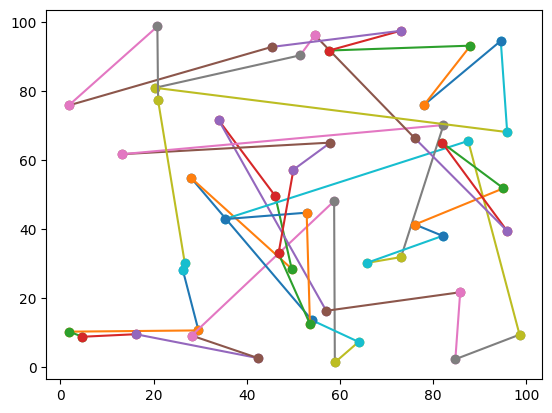

In [ ]:
di=[fitness(pob) for pob in poblacion]
pob=np.argmin(di)
seq=poblacion[pob]
for i in range(N-1):
  plt.plot([x[seq[i]], x[seq[i+1]]], [y[seq[i]], y[seq[i+1]]], 'o-')
plt.plot([x[seq[-1]], x[seq[0]]], [y[seq[-1]], y[seq[0]]], 'o-')


In [ ]:
#https://user.ceng.metu.edu.tr/~ucoluk/research/publications/tspnew.pdf
def cross_over2(poblacion, n_cruces): #n_remover significa, cuántos se eliminan
  di=[fitness(pob) for pob in poblacion]
  pr=[max(di)-d for d in di]
  K=np.sum(pr)
  pr=[pi/K for pi in pr]
  elegidos=np.random.choice(a=range(len(poblacion)), p=pr, size=(n_cruces,2), replace=False)

  for i,j in elegidos: #i y j son los índices de las poblaciones a mezclar.
    recorrido1=poblacion[i].copy()
    recorrido2=poblacion[j].copy()
    recorrido3=cruzar(recorrido1, recorrido2)
    poblacion.append(recorrido3)
  return poblacion

def cruzar(recorrido1, recorrido2):
  recorrido1=recorrido1.copy()
  lim=int(len(recorrido1)/2)
  for k in range(lim): #Desde la posición 0 hasta lim-1. Se copiará la posición desde el recorrido 2 cambiando el 1
    nodo=recorrido2[k]
    for k2 in range(N):
      if(recorrido1[k2]==nodo):
        recorrido1[k], recorrido1[k2]=recorrido1[k2], recorrido1[k]
        break
  return recorrido1

In [ ]:
from tqdm import tqdm
poblacion=[np.random.permutation(range(N)) for i in range(M)]
dmin=10000
curva2=[]
for i in range(10000):
  poblacion=prunning(poblacion, 50)
  poblacion=mutacion(poblacion, 50)
  poblacion=cross_over2(poblacion, 50)
  di=[fitness(pob) for pob in poblacion]
  if(min(di)<dmin):
    dmin=min(di)
    curva2.append((i,dmin))
    print('Iteracion: ',i,', mejor fitness: ',dmin)

Iteracion:  0 , mejor fitness:  2219.5728208726023
Iteracion:  4 , mejor fitness:  2208.8528452871556
Iteracion:  7 , mejor fitness:  2147.8154227173695
Iteracion:  11 , mejor fitness:  2054.115503603377
Iteracion:  15 , mejor fitness:  2037.4566384796829
Iteracion:  17 , mejor fitness:  2001.3939497401516
Iteracion:  37 , mejor fitness:  1943.9478794388685
Iteracion:  42 , mejor fitness:  1934.6559056251833
Iteracion:  62 , mejor fitness:  1932.9344495468538
Iteracion:  68 , mejor fitness:  1896.5823118417666
Iteracion:  70 , mejor fitness:  1884.161876913707
Iteracion:  77 , mejor fitness:  1871.029548311793
Iteracion:  82 , mejor fitness:  1857.843139158012
Iteracion:  88 , mejor fitness:  1842.802701896661
Iteracion:  93 , mejor fitness:  1829.0847173278398
Iteracion:  95 , mejor fitness:  1819.3803110565757
Iteracion:  97 , mejor fitness:  1783.9813822527622
Iteracion:  107 , mejor fitness:  1764.2199329174148
Iteracion:  108 , mejor fitness:  1744.7226800742826
Iteracion:  110 , 

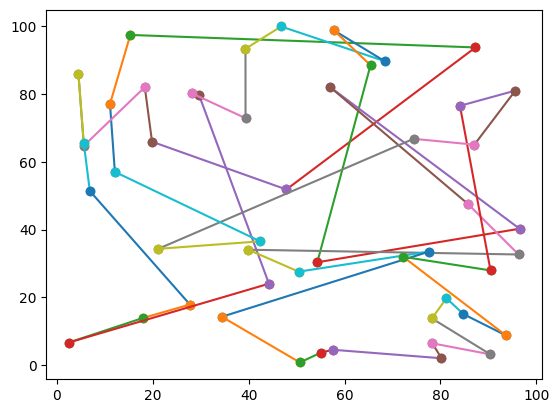

In [ ]:
di=[fitness(pob) for pob in poblacion]
pob=np.argmin(di)
seq=poblacion[pob]
for i in range(N-1):
  plt.plot([x[seq[i]], x[seq[i+1]]], [y[seq[i]], y[seq[i+1]]], 'o-')
plt.plot([x[seq[-1]], x[seq[0]]], [y[seq[-1]], y[seq[0]]], 'o-')

[0, 46, 9, 7, 28, 5, 25, 30, 45, 2, 11, 12, 21, 4, 36, 1, 32, 10, 31, 3, 23, 29, 37, 41, 35, 39, 8, 6, 13, 16, 19, 33, 20, 15, 18, 34, 24, 49, 17, 27, 14, 48, 22, 40, 47, 44, 42, 43, 26, 38]


Text(0.5, 1.0, 'Distancia: 739.243192736323')

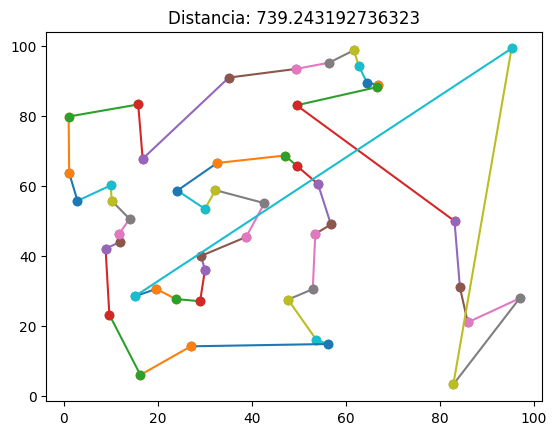

In [ ]:
#Solución heurística
disponibles=list(range(1,N))
visitados=[0]

while(len(disponibles)>0):
  actual=visitados[-1]
  dmin=1000
  for ni in disponibles:
    if(dist[actual, ni]<dmin):
      sig=ni
      dmin=dist[actual, ni]
  disponibles.remove(sig)
  visitados.append(sig)

print(visitados)
di=fitness(visitados)
seq=visitados
for i in range(N-1):
  plt.plot([x[seq[i]], x[seq[i+1]]], [y[seq[i]], y[seq[i+1]]], 'o-')
plt.plot([x[seq[-1]], x[seq[0]]], [y[seq[-1]], y[seq[0]]], 'o-')
plt.title('Distancia: '+str(di))

In [ ]:
print(np.random.permutation(8))
print(np.random.permutation(8))


[1 2 0 6 5 3 7 4]
[1 4 5 6 7 2 0 3]
